# Первое задание

## Image -> numpy array

In [3]:
from PIL import Image
import numpy as np

def get_png_array() -> np.array:
    image = Image.open("example.png")
    image_array = np.array(image)[:, :, :3]
    return image_array

get_png_array()

array([[[199,  15,  46],
        [200,  15,  46],
        [200,  15,  46],
        ...,
        [200,  15,  46],
        [200,  15,  46],
        [200,  15,  46]],

       [[200,  15,  46],
        [200,  15,  46],
        [200,  15,  46],
        ...,
        [200,  15,  46],
        [200,  15,  46],
        [200,  15,  46]],

       [[200,  15,  46],
        [200,  15,  46],
        [200,  15,  46],
        ...,
        [200,  15,  46],
        [200,  15,  46],
        [200,  15,  46]],

       ...,

       [[200,  15,  46],
        [200,  15,  46],
        [200,  15,  46],
        ...,
        [200,  15,  46],
        [200,  15,  46],
        [200,  15,  46]],

       [[200,  15,  46],
        [200,  15,  46],
        [200,  15,  46],
        ...,
        [200,  15,  46],
        [200,  15,  46],
        [200,  15,  46]],

       [[200,  15,  46],
        [200,  15,  46],
        [200,  15,  46],
        ...,
        [200,  15,  46],
        [200,  15,  46],
        [200,  15,  46]]

## Инвертирование изображения 

In [4]:
from PIL import Image
import numpy as np


image_array = get_png_array()
negative_image_array = 255 - image_array

negative_image = Image.fromarray(negative_image_array)
negative_image.show()


## Полутон

In [5]:
from PIL import Image
import numpy as np

def get_halftone_array() -> np.array:
    image_array = get_png_array()
    return np.mean(image_array, axis=2)

halftone = Image.fromarray(get_halftone_array())
halftone.show()

## Добавление шума

In [6]:
import random
from PIL import Image
import numpy as np


def get_noise_png(mean: float = 50, sigma: float = 5, data_type=float) -> np.array:
    halftone_image_array = get_halftone_array()
    return np.array([np.array([pixel + random.gauss(mean, sigma) * random.randint(0, 1) for pixel in row], dtype=data_type)
                     for row in halftone_image_array])

noise_appended = Image.fromarray(get_noise_png())
noise_appended.show()
# max(np.array([np.max(row) for row in noise_appended]))

## Построение гистограммы

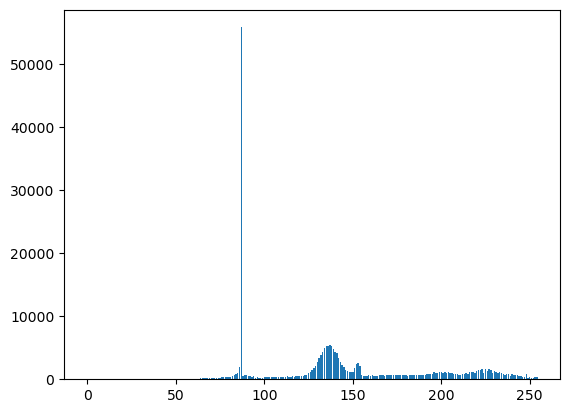

In [9]:
import random
from collections import Counter

from matplotlib.pyplot import bar
import numpy as np
import numpy.typing as npt
from PIL import Image


noise_appended_array = get_noise_png(data_type=int)

def draw_bar(data: npt.NDArray[int]):
    cnt = Counter(data.reshape(-1))
    x = list(range(255))
    y = [cnt.get(el, 0) for el in x]
    bar(x, y)

draw_bar(noise_appended_array)
# cnt.most_common(3)

In [8]:
import numpy as np
from PIL import Image


image = Image.open("example.png")
image_array = np.array(image)[:, :, :3]
